### Importing Required Libraries

In [3]:
import copy
import anndata
import joblib
import warnings
from typing import Optional, Union
import cv2
import scanpy as sc
from anndata import AnnData
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import warnings
import seaborn as sns
import operator
warnings.filterwarnings("ignore")
Path = "/home/uqomulay/90days/STimageOutputs/"

### Custom Functions for true and binarised gene expression plot

https://github.com/BiomedicalMachineLearning/STimage/blob/b474d5f1b9d01d93e66e313f089b1ef9f3975c52/stimage/_utils.py

### Figure S5 Panel a

1160920F
Continuous Expression


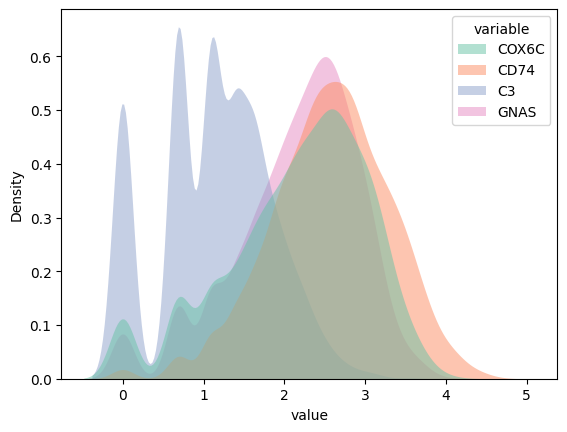

z-score transformed binarised gene expression


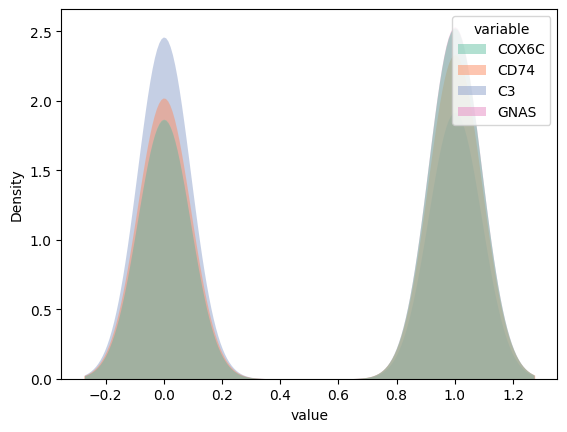

FFPE
Continuous Expression


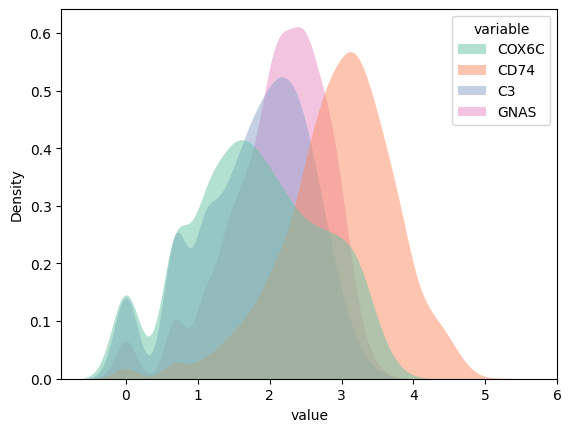

z-score transformed binarised gene expression


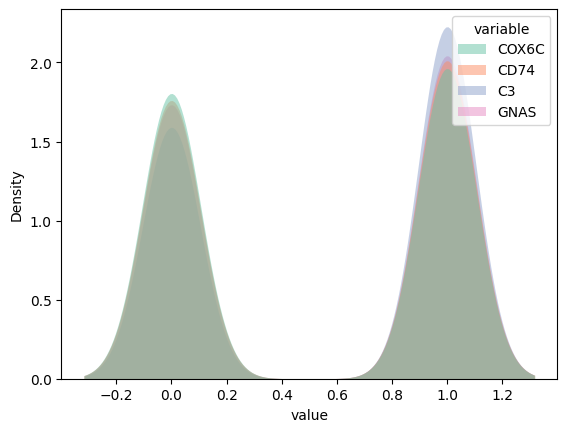

In [11]:
################################## Loading the saved anndata - pre-processed #########################

test_adata = anndata.read_h5ad(Path+"pickle/test_anndata_norm.h5ad")
FFPE = test_adata[test_adata.obs["library_id"] == "FFPE"]
F1160920 = test_adata[test_adata.obs["library_id"] == "1160920F"]

###################################### Gene Distribution Violin Plot ################################

print("1160920F")
print("Continuous Expression")
# 1160920F
fig = sns.kdeplot(x="value",
            data = pd.melt(F1160920.to_df()[["COX6C","CD74","C3","GNAS"]]), hue="variable", 
            fill=True, common_norm=False, palette="Set2",
            alpha=.5, linewidth=0)
plt.show()
#fig.figure.savefig(Path+"F1160920_Continuous_Distribution.png") 

print("z-score transformed binarised gene expression")
fig = sns.kdeplot(x="value",
            data = pd.melt(F1160920.obsm["true_gene_expression"][["COX6C","CD74","C3","GNAS"]]), hue="variable", 
            fill=True, common_norm=False, palette="Set2",
            alpha=.5, linewidth=0)
plt.show()
#fig.figure.savefig(Path+"F1160920_Binarised_Distribution.png") 

print("FFPE")
print("Continuous Expression")
# FFPE
fig = sns.kdeplot(x="value",
            data = pd.melt(FFPE.to_df()[["COX6C","CD74","C3","GNAS"]]), hue="variable", 
            fill=True, common_norm=False, palette="Set2",
            alpha=.5, linewidth=0)
plt.show()
#fig.figure.savefig(Path+"F1160920_Continuous_Distribution.png") 

print("z-score transformed binarised gene expression")
fig = sns.kdeplot(x="value",
            data = pd.melt(FFPE.obsm["true_gene_expression"][["COX6C","CD74","C3","GNAS"]]), hue="variable", 
            fill=True, common_norm=False, palette="Set2",
            alpha=.5, linewidth=0)
plt.show()
#fig.figure.savefig(Path+"F1160920_Binarised_Distribution.png") 

### Figure S5 Panel b

Continuous gene expression: COX6C


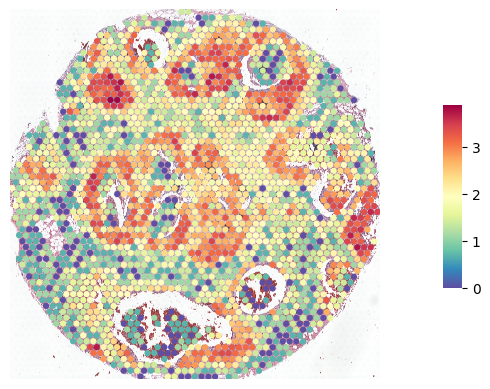

Continuous gene expression: C3


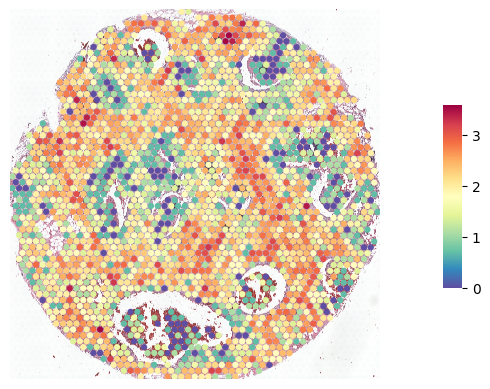

In [21]:
################################# User Input for plotting true gene expression #################################

Path = "/afm01/UQ/Q2051/STimage_project/STimage_dataset/PROCESSED/dataset_breast_cancer_9visium/"
adata_all = anndata.read_h5ad(Path+"all_adata.h5ad")
adata_pred = adata_all.copy()

adata = adata_pred[adata_pred.obs["library_id"]=="FFPE"]
print("Continuous gene expression: COX6C")
gene_plot(adata, genes="COX6C", library_id="FFPE", spot_size=20, cmap="Spectral_r")
print("Continuous gene expression: C3")
gene_plot(adata, genes="C3", library_id="FFPE", spot_size=20, cmap="Spectral_r")


Binarised gene expression: COX6C


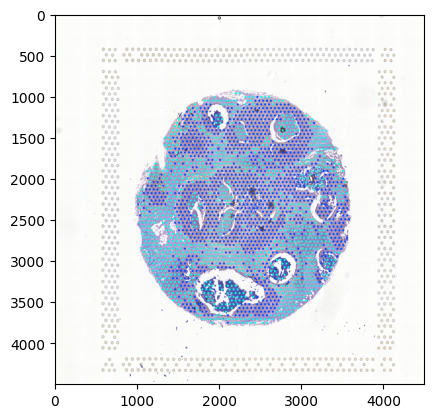

Binarised gene expression: C3


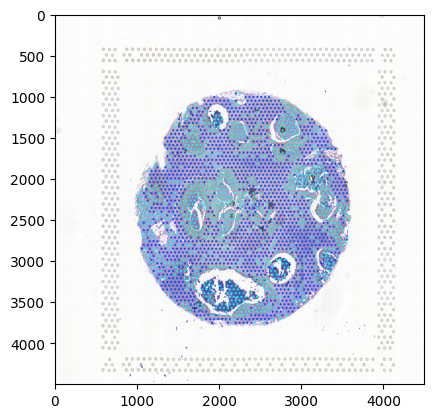

In [23]:
################################# User Input for plotting binarised gene expression #################################

print("Binarised gene expression: COX6C")
image = binarised_gene_expression_plot(Path="/home/uqomulay/90days/STimageOutputs/", test_data_library_id = "FFPE", 
                                       gene = "COX6C", condition = "true", 
                                       clf_resnet_path = "/home/uqomulay/90days/STimageOutputs/pickle/STimage_LR.pkl")
plt.imshow(image)
plt.show()

print("Binarised gene expression: C3")
image = binarised_gene_expression_plot(Path="/home/uqomulay/90days/STimageOutputs/", test_data_library_id = "FFPE", 
                                       gene = "C3", condition = "true", 
                                       clf_resnet_path = "/home/uqomulay/90days/STimageOutputs/pickle/STimage_LR.pkl")
plt.imshow(image)
plt.show()
#cv2.imwrite(Path+"GeneExpressionImages/"+gene+"_"+test_data_library_id+"_"+condition+"_test.png",image)

### Figure S5 Panel c and d

In [ ]:
### To predict the gene expression class run the following python script:- 

##### Continuous Gene Expression (Left) Predicted probability of high gene expression per spot (Right)

FFPE
Predicted - On Right True - On Left
COX6C - FFPE


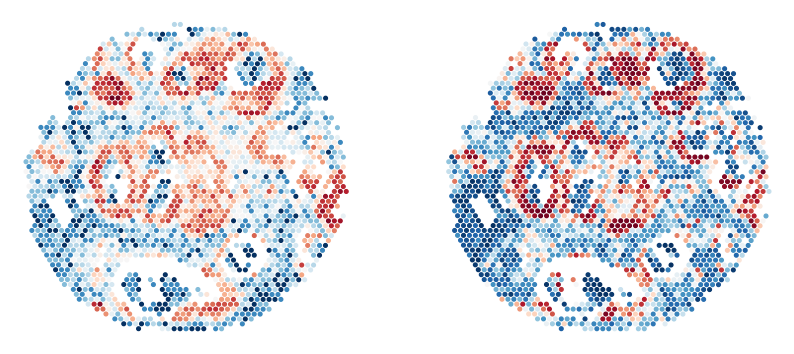

C3 - FFPE


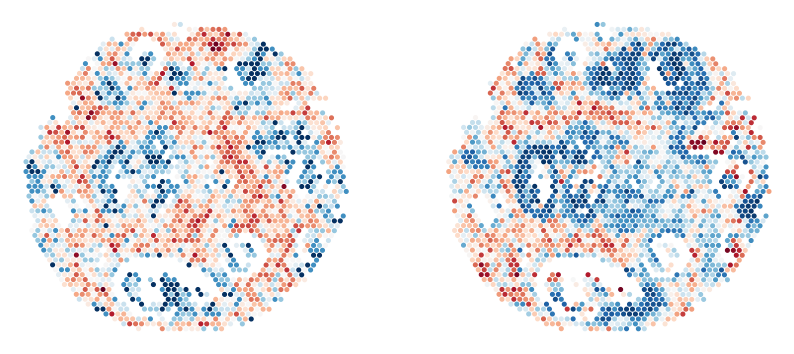

1160920F
COX6C - 1160920F


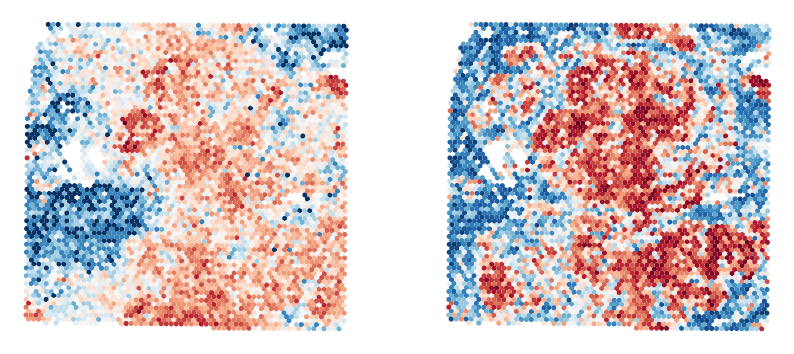

C3 - 1160920F


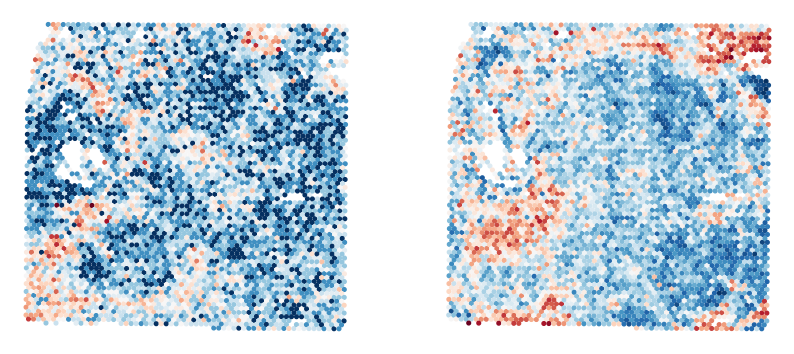

In [35]:
########################################### Loading the required data ######################################
gene_list = ['CD74', 'CD24', 'CD63', 'CD81', 'CD151', 'C3',
             'COX6C', 'TP53', 'PABPC1', 'GNAS', 'B2M', 'SPARC', 'HSP90AB1', 'TFF3', 'ATP1A1', 'FASN']
test_adata = anndata.read_h5ad("/scratch/90days/uqomulay/STimageOutputs/pickle/test_anndata_norm.h5ad") 
clf_resnet = joblib.load("/scratch/90days/uqomulay/STimageOutputs/pickle/STimage_LR.pkl")
anndata_adata_ffpe = test_adata[test_adata.obs["library_id"]=="FFPE"]
anndata_adata_1160920f = test_adata[test_adata.obs["library_id"]=="1160920F"]
predicted_proba_ffpe = clf_resnet.predict_proba(anndata_adata_ffpe.obsm["resnet50_features"])
predicted_proba_1160920f = clf_resnet.predict_proba(anndata_adata_1160920f.obsm["resnet50_features"])


cox6c_prediction_ffpe = []
for i in range(0,len(predicted_proba_ffpe[6])):
    cox6c_prediction_ffpe.append(predicted_proba_ffpe[6][i][1])
    
c3_prediction_ffpe = []
for i in range(0,len(predicted_proba_ffpe[5])):
    c3_prediction_ffpe.append(predicted_proba_ffpe[5][i][1])

cox6c_prediction_1160920f = []
for i in range(0,len(predicted_proba_1160920f[6])):
    cox6c_prediction_1160920f.append(predicted_proba_1160920f[6][i][1])
    
c3_prediction_1160920f = []
for i in range(0,len(predicted_proba_1160920f[5])):
    c3_prediction_1160920f.append(predicted_proba_1160920f[5][i][1])
    
    
print("FFPE")
print("Predicted - On Right", "True - On Left")
plt.figure(figsize=(10,20))
print("COX6C - FFPE")
plt.subplot(4,2,1)
plt.scatter(anndata_adata_ffpe.obs['imagecol'], -anndata_adata_ffpe.obs["imagerow"], c=anndata_adata_ffpe.to_df()["COX6C"],cmap="RdBu_r",s=7)
plt.axis('off')
plt.subplot(4,2,2)
plt.scatter(anndata_adata_ffpe.obs['imagecol'], -anndata_adata_ffpe.obs["imagerow"], c=cox6c_prediction_ffpe,cmap="RdBu_r",s=7)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,20))
print("C3 - FFPE")
plt.subplot(4,2,3)
plt.scatter(anndata_adata_ffpe.obs['imagecol'], -anndata_adata_ffpe.obs["imagerow"], c=anndata_adata_ffpe.to_df()["C3"],cmap="RdBu_r",s=7)
plt.axis('off')
plt.subplot(4,2,4)
plt.scatter(anndata_adata_ffpe.obs['imagecol'], -anndata_adata_ffpe.obs["imagerow"], c=c3_prediction_ffpe,cmap="RdBu_r",s=7)
plt.axis('off')
plt.show()

print("1160920F")
plt.figure(figsize=(10,20))
print("COX6C - 1160920F")
plt.subplot(4,2,5)
plt.scatter(anndata_adata_1160920f.obs['imagecol'], -anndata_adata_1160920f.obs["imagerow"], c=anndata_adata_1160920f.to_df()["COX6C"],cmap="RdBu_r",s=7)
plt.axis('off')
plt.subplot(4,2,6)
plt.scatter(anndata_adata_1160920f.obs['imagecol'], -anndata_adata_1160920f.obs["imagerow"], c=cox6c_prediction_1160920f,cmap="RdBu_r",s=7)
plt.axis('off')
plt.show()

plt.figure(figsize=(10,20))
print("C3 - 1160920F")
plt.subplot(4,2,7)
plt.scatter(anndata_adata_1160920f.obs['imagecol'], -anndata_adata_1160920f.obs["imagerow"], c=anndata_adata_1160920f.to_df()["C3"],cmap="RdBu_r",s=7)
plt.axis('off')
plt.subplot(4,2,8)
plt.scatter(anndata_adata_1160920f.obs['imagecol'], -anndata_adata_1160920f.obs["imagerow"], c=c3_prediction_1160920f,cmap="RdBu_r",s=7)
plt.axis('off')
plt.show()

##### Binarsed predicted gene expression

FFPE
COX6C and C3


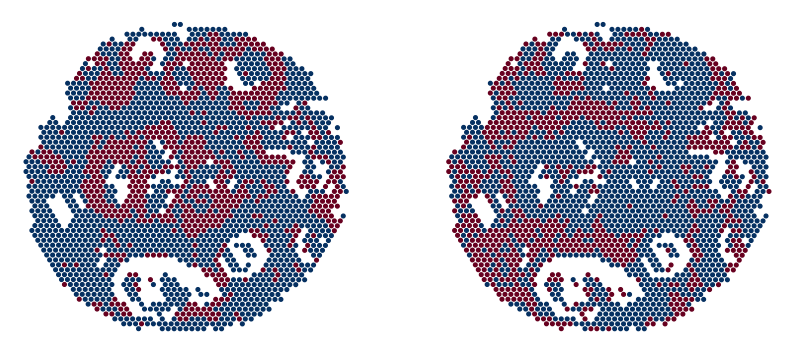

1160920F
COX6C and C3


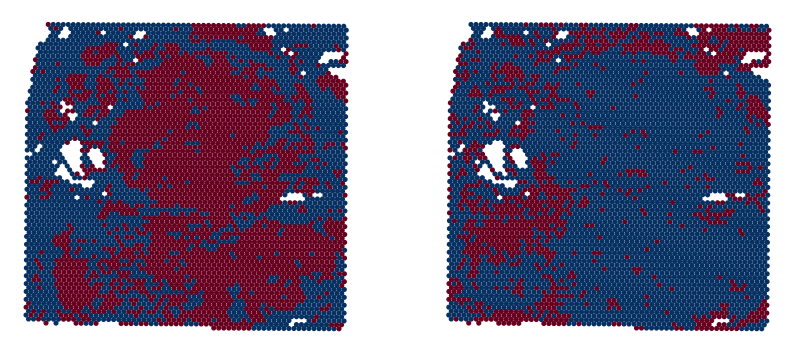

In [41]:
print("FFPE")    
plt.figure(figsize=(10,20))
plt.subplot(4,2,1)
print("COX6C and C3")
plt.scatter(anndata_adata_ffpe.obs['imagecol'], -anndata_adata_ffpe.obs["imagerow"], c=anndata_adata_ffpe.obsm["predicted_gene_expression"]["COX6C"],cmap="RdBu_r",s=7)
plt.axis('off')
plt.subplot(4,2,2)
plt.scatter(anndata_adata_ffpe.obs['imagecol'], -anndata_adata_ffpe.obs["imagerow"], c=anndata_adata_ffpe.obsm["predicted_gene_expression"]["C3"],cmap="RdBu_r",s=7)
plt.axis('off')
plt.show()

print("1160920F")    
plt.figure(figsize=(10,20))
plt.subplot(4,2,1)
print("COX6C and C3")
plt.scatter(anndata_adata_1160920f.obs['imagecol'], -anndata_adata_1160920f.obs["imagerow"], c=anndata_adata_1160920f.obsm["predicted_gene_expression"]["COX6C"],cmap="RdBu_r",s=7)
plt.axis('off')
plt.subplot(4,2,2)
plt.scatter(anndata_adata_1160920f.obs['imagecol'], -anndata_adata_1160920f.obs["imagerow"], c=anndata_adata_1160920f.obsm["predicted_gene_expression"]["C3"],cmap="RdBu_r",s=7)
plt.axis('off')
plt.show()
